## HW-2: Task1
### Taslima Akter
### ID: takter

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.datasets import fetch_mldata

%matplotlib notebook

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.33


### Loading MNIST data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Q1: Baseline Network

Fully connected network with 5 hidden layers

In [4]:
def xavierfunc(shape):
    return np.sqrt(2.0/sum(shape))

In [5]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10]) # original

W1 = tf.Variable(tf.truncated_normal([784, 1024], stddev = xavierfunc([784, 1024]) ))
b1 = tf.Variable(tf.truncated_normal([1024], stddev = xavierfunc([1024]) ))

W2 = tf.Variable(tf.truncated_normal([1024, 1024], stddev = xavierfunc([1024, 1024]) ))
b2 = tf.Variable(tf.truncated_normal([1024], stddev = xavierfunc([1024]) ))

W3 = tf.Variable(tf.truncated_normal([1024, 1024], stddev = xavierfunc([1024, 1024]) ))
b3 = tf.Variable(tf.truncated_normal([1024], stddev = xavierfunc([1024]) ))

W4 = tf.Variable(tf.truncated_normal([1024, 1024], stddev = xavierfunc([1024, 1024]) ))
b4 = tf.Variable(tf.truncated_normal([1024], stddev = xavierfunc([1024]) ))

W5 = tf.Variable(tf.truncated_normal([1024, 1024], stddev = xavierfunc([1024, 1024]) ))
b5 = tf.Variable(tf.truncated_normal([1024], stddev = xavierfunc([1024]) ))

W6 = tf.Variable(tf.truncated_normal([1024, 10], stddev = xavierfunc([1024, 10]) ))
b6 = tf.Variable(tf.truncated_normal([10], stddev = xavierfunc([10]) ))

y1 = tf.nn.leaky_relu((x@W1) + b1)
y2 = tf.nn.leaky_relu((y1@W2) + b2)
y3 = tf.nn.leaky_relu((y2@W3) + b3)
y4 = tf.nn.leaky_relu((y3@W4) + b4)
y5 = tf.nn.leaky_relu((y4@W5) + b5)
y_pred = ((y5@W6) + b6 )# predicted

centropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_pred))
train_model = tf.train.AdamOptimizer().minimize(centropy)

In [7]:
sess = tf.InteractiveSession(config=config)
tf.global_variables_initializer().run()


In [11]:
# Train The model
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(1000)
    sess.run(train_model, feed_dict={x: batch_xs, y_: batch_ys})

In [12]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

Accuracy: 0.9811


In [13]:
def reduced_model(x, y_, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6 ):
    y1 = tf.nn.leaky_relu((x@W1) + b1)
    y2 = tf.nn.leaky_relu((y1@W2) + b2)
    y3 = tf.nn.leaky_relu((y2@W3) + b3)
    y4 = tf.nn.leaky_relu((y3@W4) + b4)
    y5 = tf.nn.leaky_relu((y4@W5) + b5)
    y_pred = ((y5@W6) + b6 )# predicted

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

### Q3: Applying svd on each weight

In [14]:
St_1, Ut_1, Vt_1 = tf.svd(W1)
St_2, Ut_2, Vt_2 = tf.svd(W2)
St_3, Ut_3, Vt_3 = tf.svd(W3)
St_4, Ut_4, Vt_4 = tf.svd(W4)
St_5, Ut_5, Vt_5 = tf.svd(W5)

In [15]:
print(Ut_1)
print(St_1)
print(Vt_1)
print(Ut_1[:,1:20])

Tensor("Svd:1", shape=(784, 784), dtype=float32)
Tensor("Svd:0", shape=(784,), dtype=float32)
Tensor("Svd:2", shape=(1024, 784), dtype=float32)
Tensor("strided_slice:0", shape=(784, 19), dtype=float32)


### Q4: Recalculating w 

In [16]:
def mult_svd(st,ut, vt, D):
    tmp = ut[:,:D] * st[:D]
    vt = tf.transpose(vt[:,:D])
    return tf.matmul(tmp,vt)
    

In [17]:
acc_list=[]

### Q5: By varying D testing accuracy: 
### D = 10

In [18]:
## D=10

w1_10= mult_svd(St_1,Ut_1, Vt_1, 10)
w2_10= mult_svd(St_2,Ut_2, Vt_2, 10)
w3_10= mult_svd(St_3,Ut_3, Vt_3, 10)
w4_10= mult_svd(St_4,Ut_4, Vt_4, 10)
w5_10= mult_svd(St_5,Ut_5, Vt_5, 10)

acc=reduced_model(x, y_, w1_10, b1, w2_10, b2, w3_10, b3, w4_10, b4, w5_10, b5, W6, b6 )
acc_list.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print("Accuracy:", acc_list[-1])

Accuracy: 0.6852


### D = 20

In [19]:
## D=20

w1_20= mult_svd(St_1,Ut_1, Vt_1, 20)
w2_20= mult_svd(St_2,Ut_2, Vt_2, 20)
w3_20= mult_svd(St_3,Ut_3, Vt_3, 20)
w4_20= mult_svd(St_4,Ut_4, Vt_4, 20)
w5_20= mult_svd(St_5,Ut_5, Vt_5, 20)

acc=reduced_model(x, y_, w1_20, b1, w2_20, b2, w3_20, b3, w4_20, b4, w5_20, b5, W6, b6 )
acc_list.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print("Accuracy:", acc_list[-1])

Accuracy: 0.9117


### D = 50

In [20]:
## D=50

w1_50= mult_svd(St_1,Ut_1, Vt_1, 50)
w2_50= mult_svd(St_2,Ut_2, Vt_2, 50)
w3_50= mult_svd(St_3,Ut_3, Vt_3, 50)
w4_50= mult_svd(St_4,Ut_4, Vt_4, 50)
w5_50= mult_svd(St_5,Ut_5, Vt_5, 50)

acc=reduced_model(x, y_, w1_50, b1, w2_50, b2, w3_50, b3, w4_50, b4, w5_50, b5, W6, b6 )
acc_list.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print("Accuracy:", acc_list[-1])

Accuracy: 0.9734


### D = 100

In [21]:
## D=100

w1_100= mult_svd(St_1,Ut_1, Vt_1, 100)
w2_100= mult_svd(St_2,Ut_2, Vt_2, 100)
w3_100= mult_svd(St_3,Ut_3, Vt_3, 100)
w4_100= mult_svd(St_4,Ut_4, Vt_4, 100)
w5_100= mult_svd(St_5,Ut_5, Vt_5, 100)

acc=reduced_model(x, y_, w1_100, b1, w2_100, b2, w3_100, b3, w4_100, b4, w5_100, b5, W6, b6 )
acc_list.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print("Accuracy:", acc_list[-1])

Accuracy: 0.9776


### D = 200

In [22]:
## D=200

w1_200= mult_svd(St_1,Ut_1, Vt_1, 200)
w2_200= mult_svd(St_2,Ut_2, Vt_2, 200)
w3_200= mult_svd(St_3,Ut_3, Vt_3, 200)
w4_200= mult_svd(St_4,Ut_4, Vt_4, 200)
w5_200= mult_svd(St_5,Ut_5, Vt_5, 200)

acc=reduced_model(x, y_, w1_200, b1, w2_200, b2, w3_200, b3, w4_200, b4, w5_200, b5, W6, b6 )
acc_list.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print("Accuracy:", acc_list[-1])

Accuracy: 0.9803


### D = 1024

In [23]:
# D=1024
acc=reduced_model(x, y_, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6 )
acc_list.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print("Accuracy:", acc_list[-1])

Accuracy: 0.9811


In [24]:
print(w1_10)
print(w2_10)
print(w3_10)
print(w4_10)
print(w5_10)

Tensor("MatMul:0", shape=(784, 1024), dtype=float32)
Tensor("MatMul_1:0", shape=(1024, 1024), dtype=float32)
Tensor("MatMul_2:0", shape=(1024, 1024), dtype=float32)
Tensor("MatMul_3:0", shape=(1024, 1024), dtype=float32)
Tensor("MatMul_4:0", shape=(1024, 1024), dtype=float32)


<IPython.core.display.Javascript object>


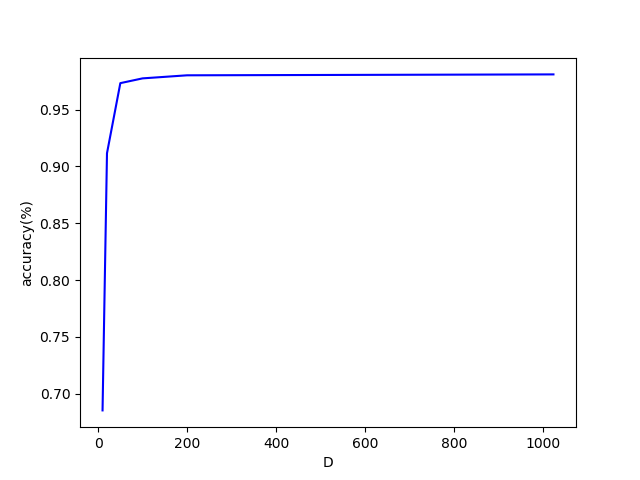

In [25]:
D=[10,20,50,100,200,1024]
%matplotlib notebook
plt.figure('Plot: Accuracy vs D')
plt.plot(D, acc_list, 'b-')
plt.xlabel("D")
plt.ylabel("accuracy(%)")
plt.show()

### Q6: Fixing D=20 and improving the network

In [26]:
#D=20
acc=reduced_model(x, y_, w1_20, b1, w2_20, b2, w3_20, b3, w4_20, b4, w5_20, b5, W6, b6 )
acc_list.append(sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print("Accuracy:", acc_list[-1])

Accuracy: 0.9117


In [27]:
D=20

ut_1, svt_1 = Ut_1[:,:D], tf.diag(St_1[:D])@ tf.transpose(Vt_1[:,:D])
ut_2, svt_2 = Ut_2[:,:D], tf.diag(St_2[:D])@ tf.transpose(Vt_2[:,:D])
ut_3, svt_3 = Ut_3[:,:D], tf.diag(St_3[:D])@ tf.transpose(Vt_3[:,:D])
ut_4, svt_4 = Ut_4[:,:D], tf.diag(St_4[:D])@ tf.transpose(Vt_4[:,:D])
ut_5, svt_5 = Ut_5[:,:D], tf.diag(St_5[:D])@ tf.transpose(Vt_5[:,:D])

# Define tensors with initialization: u and svT 

d_u_1 = tf.Variable(ut_1)
d_svT_1 = tf.Variable(svt_1)

d_u_2 = tf.Variable(ut_2)
d_svT_2 = tf.Variable(svt_2)

d_u_3 = tf.Variable(ut_3)
d_svT_3 = tf.Variable(svt_3)

d_u_4 = tf.Variable(ut_4)
d_svT_4 = tf.Variable(svt_4)

d_u_5 = tf.Variable(ut_5)
d_svT_5 = tf.Variable(svt_5)


# Layer connections and Activation functions
d_y_1 = tf.nn.relu(tf.matmul(x, d_u_1@d_svT_1) + b1)
d_y_2 = tf.nn.relu(tf.matmul(d_y_1, d_u_2@d_svT_2) + b2)
d_y_3 = tf.nn.relu(tf.matmul(d_y_2, d_u_3@d_svT_3) + b3)
d_y_4 = tf.nn.relu(tf.matmul(d_y_3, d_u_4@d_svT_4) + b4)
d_y_5 = tf.nn.relu(tf.matmul(d_y_4, d_u_5@d_svT_5) + b5)
d_y = tf.matmul(d_y_5, W6) + b6 # predicted

# Define loss and optimizer
d_cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=d_y))
d_train_step = tf.train.AdamOptimizer().minimize(d_cross_entropy)

### Training the model 

In [29]:
tf.global_variables_initializer().run()


# Train Model
s = time.time()
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(1000)
    sess.run(d_train_step, feed_dict={x: batch_xs, y_: batch_ys})

d_correct_prediction = tf.equal(tf.argmax(d_y, 1), tf.argmax(y_, 1))
d_accuracy = tf.reduce_mean(tf.cast(d_correct_prediction, tf.float32))

print("Accuracy:",sess.run(d_accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))


Accuracy: 0.9676
